<a href="https://colab.research.google.com/github/thejasrao262003/ICMR_CANCER_PREDICTION/blob/main/ICMR_CANCER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Connect to Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***Import Packages***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

## ***Importing Dataset using Pandas***

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/data_icmr.csv')
dataset

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


## ***Importing Labels using Pandas***

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Datasets/labels.csv')
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


## ***Renaming Column Name in the Dataset***

In [ ]:
dataset.rename(columns = {'Unnamed: 0':'Cancer Type'}, inplace = True)
dataset

,Cancer Type,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


## ***Replacing Sample Labels with Cancer Type***

In [ ]:
for i in range (0,801):
  #dataset.iat[i,0] = labels.iat[i,1]
  dataset['Cancer Type'] = dataset['Cancer Type'].replace(dataset.iat[i,0], labels.iat[i,1])
dataset

,Cancer Type,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


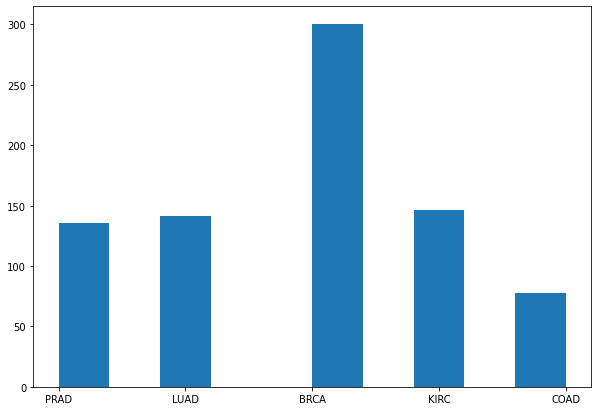

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(dataset['Cancer Type'])
plt.show()

## ***Checking for NaN Values***

In [ ]:
for col in dataset.columns:
  if dataset[col].isnull().sum() > 0:
    print(col)
# No NaN Values found

## ***Encoding Categorical Data using Label Transformer***

In [ ]:
dataset['Cancer Type'].unique()
le = preprocessing.LabelEncoder()
le.fit(dataset['Cancer Type'])
print(le.classes_)
encoded_cancer_type = le.transform(dataset['Cancer Type'])
for i in range (0,801):
  #dataset.iat[i,0] = labels.iat[i,1]
  dataset['Cancer Type'] = dataset['Cancer Type'].replace(dataset.iat[i,0], encoded_cancer_type[i])
dataset

['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


,Cancer Type,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,4,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,3,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,4,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,4,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,3,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,1,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,4,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


## ***Feature Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
col_header = list(dataset.columns)
del col_header[0]
dataset[col_header] = sc.fit_transform(dataset[col_header])
dataset[col_header] = sc.fit_transform(dataset[col_header])

In [ ]:
dataset

,Cancer Type,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,4,-0.194799,-0.828030,0.159800,-1.948277,1.221575,0.0,-0.207968,0.180910,-0.125376,...,-1.300200,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901
1,3,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,0.0,-0.532222,-0.983088,-0.125376,...,-1.747076,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901
2,4,-0.194799,0.417348,1.156735,0.249807,0.112832,0.0,-0.391297,-0.092995,-0.125376,...,-1.034088,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901
3,4,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.0,0.395348,-0.127831,-0.125376,...,0.241299,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901
4,0,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,0.0,-0.757118,-0.273165,-0.125376,...,0.133335,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,-0.194799,-0.954328,-0.354155,0.983356,0.380054,0.0,-0.578502,-0.005819,-0.125376,...,0.256806,0.584642,-0.135605,-0.152573,-0.238559,0.431432,-0.589804,0.890943,1.587933,-0.261901
797,3,-0.194799,0.776655,1.275624,-0.588497,0.480533,0.0,-0.076907,-0.983088,-0.125376,...,0.637193,1.422436,-0.612944,0.717105,-1.270672,-0.162408,0.279202,-1.499107,1.993137,-0.261901
798,1,-0.194799,0.198881,0.574816,2.292529,-0.611452,0.0,0.118352,2.578699,-0.125376,...,-0.237537,-0.257444,1.132504,-0.528281,-0.733465,0.654847,0.906442,-0.220082,-0.410467,1.348558
799,4,-0.194799,-0.350453,-0.288632,0.934054,0.342783,0.0,1.632398,-0.983088,-0.125376,...,-0.149258,-0.266264,2.502171,-0.042767,-0.216665,-0.811922,0.310652,1.437193,0.091951,-0.261901




```
# This is formatted as code
```

## ***PCA***

In [ ]:
dataset_pca = dataset.drop(['Cancer Type'], axis=1)
dataset_pca.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,-0.194799,-0.828030,0.159800,-1.948277,1.221575,0.0,-0.207968,0.180910,-0.125376,-0.065633,...,-1.300200,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901
1,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,0.0,-0.532222,-0.983088,-0.125376,-0.065633,...,-1.747076,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901
2,-0.194799,0.417348,1.156735,0.249807,0.112832,0.0,-0.391297,-0.092995,-0.125376,-0.065633,...,-1.034088,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901
3,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.0,0.395348,-0.127831,-0.125376,-0.065633,...,0.241299,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901
4,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,0.0,-0.757118,-0.273165,-0.125376,-0.065633,...,0.133335,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901


In [ ]:
x_pca = dataset_pca.values
x_pca

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [ ]:
from sklearn.decomposition import PCA
pca_with_2=PCA(n_components=2)

In [ ]:
X_pca_with_2 = pca_with_2.fit_transform(x_pca)
X_pca_with_2.shape

(801, 2)

In [ ]:
X_pca_with_2

array([[-57.44698698,  95.41098169],
       [-16.91943   ,   0.73246992],
       [-70.34521782, -19.30332936],
       ...,
       [ -4.13308976,  15.69001677],
       [-30.81475745,  33.52642209],
       [-22.34455668,   4.05235571]])

In [ ]:
df_pca = pd.DataFrame(X_pca_with_2)
df_pca.columns = ['pca1','pca2']

df_pca['Cancer Type'] = dataset['Cancer Type']
ml_x = df_pca.iloc[:,:-1].values
ml_y = df_pca.iloc[:,-1].values

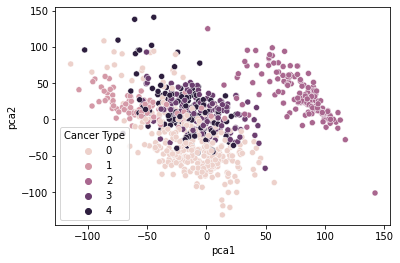

In [ ]:
import seaborn as sns
sns.scatterplot(x='pca1',y='pca2', hue = 'Cancer Type',data=df_pca)

In [ ]:
from sklearn.cluster import KMeans
clusters = KMeans(5, n_init = 5)
clusters.fit(X_pca_with_2)
clusters.labels_

array([3, 1, 2, 2, 4, 2, 0, 1, 4, 2, 1, 0, 1, 3, 4, 4, 1, 0, 0, 2, 4, 1,
       1, 2, 0, 1, 2, 4, 1, 4, 4, 4, 0, 3, 2, 4, 0, 1, 2, 3, 0, 2, 1, 0,
       0, 4, 3, 2, 4, 1, 4, 2, 4, 2, 2, 2, 4, 2, 0, 1, 1, 1, 4, 1, 2, 2,
       1, 2, 0, 2, 0, 1, 2, 1, 4, 2, 4, 3, 1, 2, 4, 2, 4, 4, 3, 2, 4, 2,
       0, 2, 2, 2, 4, 3, 4, 2, 2, 4, 1, 1, 4, 0, 4, 0, 1, 0, 2, 2, 2, 1,
       3, 4, 1, 2, 4, 0, 0, 0, 4, 4, 1, 0, 2, 2, 1, 2, 2, 4, 0, 4, 2, 2,
       3, 1, 4, 0, 0, 4, 0, 2, 4, 2, 4, 0, 1, 2, 3, 4, 1, 2, 1, 1, 4, 4,
       1, 1, 4, 1, 2, 1, 3, 1, 0, 1, 1, 1, 2, 0, 1, 4, 0, 1, 4, 2, 4, 2,
       1, 1, 1, 0, 2, 0, 4, 1, 2, 1, 1, 1, 4, 1, 1, 0, 3, 4, 2, 4, 3, 4,
       2, 1, 4, 0, 0, 0, 0, 4, 3, 2, 1, 1, 1, 4, 1, 2, 2, 1, 4, 4, 1, 1,
       0, 1, 0, 0, 1, 4, 0, 2, 4, 1, 3, 4, 2, 3, 0, 1, 0, 2, 1, 0, 0, 4,
       2, 1, 1, 2, 0, 1, 1, 2, 4, 2, 1, 1, 1, 0, 3, 1, 1, 4, 1, 2, 1, 2,
       2, 2, 1, 4, 4, 0, 0, 4, 2, 3, 0, 2, 4, 4, 0, 4, 4, 4, 3, 2, 1, 4,
       4, 4, 0, 0, 0, 0, 2, 4, 4, 0, 4, 4, 1, 1, 1,

In [ ]:
pca_with_2_data_frame = pd.DataFrame(data=X_pca_with_2,columns=['pca1','pca2'])
pca_with_2_data_frame

,pca1,pca2
0,-57.446987,95.410982
1,-16.919430,0.732470
2,-70.345218,-19.303329
3,-49.161591,-9.227588
4,-18.132534,-51.327797
...,...,...
796,-12.417385,-42.321573
797,-29.415554,28.526280
798,-4.133090,15.690017
799,-30.814757,33.526422


In [ ]:
pca_with_2_data_frame['Cls_label'] = clusters.labels_
pca_with_2_data_frame['given_cancer_type'] = labels.Class.values
pca_with_2_data_frame

,pca1,pca2,Cls_label,given_cancer_type
0,-57.446987,95.410982,3,PRAD
1,-16.919430,0.732470,1,LUAD
2,-70.345218,-19.303329,2,PRAD
3,-49.161591,-9.227588,2,PRAD
4,-18.132534,-51.327797,4,BRCA
...,...,...,...,...
796,-12.417385,-42.321573,4,BRCA
797,-29.415554,28.526280,2,LUAD
798,-4.133090,15.690017,1,COAD
799,-30.814757,33.526422,2,PRAD


In [ ]:
brca = pca_with_2_data_frame.groupby('given_cancer_type').get_group('BRCA')
brca.Cls_label.value_counts()

4    196
1     50
2     37
3     17
Name: Cls_label, dtype: int64

In [ ]:
luad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('LUAD')
luad.Cls_label.value_counts()

1    89
2    37
4     9
3     5
0     1
Name: Cls_label, dtype: int64

In [ ]:
coad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('COAD')
coad.Cls_label.value_counts()

2    61
3    10
1     7
Name: Cls_label, dtype: int64

In [ ]:
prad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('PRAD')
prad.Cls_label.value_counts()

2    62
1    50
3    13
4    11
Name: Cls_label, dtype: int64

In [ ]:
kirc =  pca_with_2_data_frame.groupby('given_cancer_type').get_group('KIRC')
kirc.Cls_label.value_counts()

0    139
1      6
3      1
Name: Cls_label, dtype: int64

In [ ]:
import random
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ml_x,ml_y,test_size=0.3,random_state=1)



In [ ]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)



0.6846473029045643

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

sv_clf = SVC(probability=True, kernel='linear')
sv_clf.fit(x_train,y_train)
sv_clf.score(x_test,y_test)


y_pred = sv_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6721991701244814


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

sv_clf = SVC(probability=True, kernel='rbf')
sv_clf.fit(x_train,y_train)
sv_clf.score(x_test,y_test)


y_pred = sv_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6846473029045643


In [ ]:
from sklearn import ensemble

rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
rf_clf.score(x_test,y_test)

0.6804979253112033

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train,y_train)
knn_clf.score(x_test,y_test)

0.7053941908713693